# Máquina de Vector de soporte - Support Vector Machine --SVM

El funcionamiento del SVM se puede entender en términos de como encuentra un hiperplano óptimo para separar los datos en diferentes clases en el caso de la clasificación. 


## Caracteristicas:

El SVM es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión.

    1. Clasificación y regresión: El SVM se puede utilizar ptanto para problemas de clasificación como de regresión. En clasificación, el SVM busca encontrar un hiperplano óptimo que separe las clases en el espacio de caracteristicas. En regresión, EL SVM busca encontrar una función que se ajuste a los datos con la menor cantidad de error posible.
    2.Margen Máximo: En el caso de la clasificación, el SVM busca encontrar un hiperplano que maximice el margen entre las clases. Este margen es la distancia perpendicular desde el hiperplano a los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte. Maximizar este margen ayuda a mejorar la generalización del modelo y reduce el riesgo de sobreajuste.
    3. Sensibilidad a los Outliers: El SVM puede ser sensible a los outliers, ya que los vectores de soporte son críticos para determinar el hiperplano óptimo. Un outlier cerca de los vectores de soporte puede afectar significativamente la posición del hiperplano.

## Problemática:

En el ámbito del medio ambiente, una preocupación creciente es la contaminación del aire. La calidad del aire tiene un impacto significativo en la salud pública y el medio ambiente. Predecir la calidad del aire en función de diversos factores puede ayudar a las autoridades a tomar medidas preventivas y a los ciudadanos a reducir su exposición a contaminantes nocivos.
Queremos desarrollar un modelo que pueda predecir la calidad del aire basándose en diversas características ambientales. Utilizaremos un modelo de Máquina de Vectores de Soporte (SVM) para esta tarea de clasificación. 



    

Las Máquinas de Soporte Vectorial (Support Vector Machines, SVM) son un conjunto de métodos supervisados de aprendizaje utilizados para clasificación y regresión. El objetivo de una SVM es encontrar el hiperplano en un espacio N-dimensional (donde N es el número de características) que separa los datos en diferentes clases. Este hiperplano se selecciona de manera que tenga el máximo margen, es decir, la mayor distancia posible entre las muestras de las clases más cercanas (vectores de soporte).

### Conceptos Clave de SVM:

1. *Hiperplano*: En un espacio de N dimensiones, un hiperplano es una subestructura de N-1 dimensiones que separa los datos en diferentes clases.
2. *Margen*: La distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar este margen.
3. *Vectores de Soporte*: Los puntos de datos que están más cerca del hiperplano y que determinan su posición y orientación.




Para este problema, utilizaremos un conjunto de datos como el Air Quality Dataset disponible en UCI.https://archive.ics.uci.edu/ml/datasets/air+quality


- **Date**: la fecha en la que se tomaron las mediciones.
- **Time**: La hora a la que se tomaron las mediciones.
- **CO(GT)**: Concentración de monóxido de carbono (CO) en mg/m³.  --> **Esta seria la variable objetivo**
- **PT08.S1(CO)**: Concentración de CO medida por el sensor espectral PT08.S1 en microg/m³.
- **NMHC(GT)**: Concentración de hidrocarburos no metánicos (NMHC) medido en microg/m³.
- **C6H6(GT)**: Concentración de benceno (C6H6) medido por sensor espectral PT08.S2 en microg/m³.
- **PT08.S2(NMHC)**: Concentración de NMHC medida por sensor espectral PT08.S2 en microg/m³.
- **NOx(GT)**: Concentración de óxidos de nitrógeno (NOx) medido por sensor químico T90/T100 en ppb.
- **PT08.S3(NOx)**: Concentración de NOx medida por el sensor espectral PT08.S3 en microg/m³.
- **NO2(GT)**: Concentración de dióxido de nitrógeno (NO2) medido por sensor químico T90/T100 en microg/m³.
- **PT08.S4(NO2)**: Concentración del NO2 medida por el sensor espectral PT08.S4 en microg/m³.
- **PT08.S5(O3)**: Concentración del ozono (O3) medida por el sensor espectral PT08.S5 en microg/m³.
- **T**: Temperatura ambiente registrada dentro del analizador automático a °C.
- **RH**: Humedad relativa registrada dentro del analizador automático (%).
- **AH**: Humedad absoluta.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR



In [2]:
# Cargar conjunto de datos:

data=pd.read_csv('C:/Users/jhinn/OneDrive/Desktop/especializacion/Curso Machine learning/Librerio scikit-learn/Maquinas de soporte Vectorial -SVM/Copia de AirQualityUCI.csv',delimiter=',')
data.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
data.shape

(7788, 17)

In [5]:
data.tail() # ayuda a observar los ultimos 5 datos por defecto 

#data.tail(100) # los ultimos 100 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
7783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe(include='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674,7674,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,0.0,0.0
unique,355,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,25/09/2004,19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.152750,1054.222700,-150.867735,1.233385,897.865911,230.809747,782.760099,97.746286,1374.024498,990.038963,8.405786,38.349909,-7.653565,NaN,NaN
std,NaN,NaN,1.453252,341.261735,152.553382,43.276414,348.728250,233.316418,326.251230,85.341664,478.335306,470.166864,45.022976,53.334406,40.777732,NaN,NaN
min,NaN,NaN,0.100000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,NaN,NaN,1.100000,927.000000,-200.000000,4.100000,716.000000,90.000000,628.000000,73.000000,1157.000000,704.000000,10.300000,33.500000,0.650000,NaN,NaN
50%,NaN,NaN,1.800000,1062.000000,-200.000000,8.100000,903.000000,177.000000,782.000000,107.000000,1425.000000,968.000000,16.300000,48.100000,0.940600,NaN,NaN
75%,NaN,NaN,2.900000,1235.000000,-200.000000,14.000000,1116.750000,326.000000,949.000000,141.000000,1659.000000,1287.000000,23.500000,61.800000,1.235200,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788 entries, 0 to 7787
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7674 non-null   float64
 4   NMHC(GT)       7674 non-null   float64
 5   C6H6(GT)       7674 non-null   float64
 6   PT08.S2(NMHC)  7674 non-null   float64
 7   NOx(GT)        7674 non-null   float64
 8   PT08.S3(NOx)   7674 non-null   float64
 9   NO2(GT)        7674 non-null   float64
 10  PT08.S4(NO2)   7674 non-null   float64
 11  PT08.S5(O3)    7674 non-null   float64
 12  T              7674 non-null   float64
 13  RH             7674 non-null   float64
 14  AH             7674 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.0+ MB


In [8]:
#verificar valores nulos

print(data.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      7788
Unnamed: 16      7788
dtype: int64


In [9]:
data=data.loc[:,['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]

data.columns

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788 entries, 0 to 7787
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7674 non-null   float64
 4   NMHC(GT)       7674 non-null   float64
 5   C6H6(GT)       7674 non-null   float64
 6   PT08.S2(NMHC)  7674 non-null   float64
 7   NOx(GT)        7674 non-null   float64
 8   PT08.S3(NOx)   7674 non-null   float64
 9   NO2(GT)        7674 non-null   float64
 10  PT08.S4(NO2)   7674 non-null   float64
 11  PT08.S5(O3)    7674 non-null   float64
 12  T              7674 non-null   float64
 13  RH             7674 non-null   float64
 14  AH             7674 non-null   float64
dtypes: float64(13), object(2)
memory usage: 912.8+ KB


(7788, 15)

In [10]:

# en caso que  tuvieramos columnas con ',' python tomaria estas como object y no float por tanto se debe remplazar ese ',' por  un '.'  asi
#data['T']=data['T'].str.replace(',','.')



# intenta convertir los valores de la columna CO(GT) a nuericoss
try:
    pd.to_numeric(data['CO(GT)'])
    print('Todos los valores son numericos en la columna CO(GT)')
except ValueError:
    print('Hay valores de texto en la columna CO(GT)')
        



Todos los valores son numericos en la columna CO(GT)


In [11]:
# filtar el dataframe para mostrar solo las filas con valores de texto en la columna CO(GT)

text_values=data[~data['CO(GT)'].apply(lambda x:pd.to_numeric(x,errors='coerce')).notnull()]

# mostrar los valores de texto eb la columna CO(GT)
print(text_values['CO(GT)'])

7674   NaN
7675   NaN
7676   NaN
7677   NaN
7678   NaN
        ..
7783   NaN
7784   NaN
7785   NaN
7786   NaN
7787   NaN
Name: CO(GT), Length: 114, dtype: float64


In [12]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7674 entries, 0 to 7673
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7674 non-null   float64
 4   NMHC(GT)       7674 non-null   float64
 5   C6H6(GT)       7674 non-null   float64
 6   PT08.S2(NMHC)  7674 non-null   float64
 7   NOx(GT)        7674 non-null   float64
 8   PT08.S3(NOx)   7674 non-null   float64
 9   NO2(GT)        7674 non-null   float64
 10  PT08.S4(NO2)   7674 non-null   float64
 11  PT08.S5(O3)    7674 non-null   float64
 12  T              7674 non-null   float64
 13  RH             7674 non-null   float64
 14  AH             7674 non-null   float64
dtypes: float64(13), object(2)
memory usage: 959.2+ KB


In [13]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7674 entries, 0 to 7673
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7674 non-null   float64
 4   NMHC(GT)       7674 non-null   float64
 5   C6H6(GT)       7674 non-null   float64
 6   PT08.S2(NMHC)  7674 non-null   float64
 7   NOx(GT)        7674 non-null   float64
 8   PT08.S3(NOx)   7674 non-null   float64
 9   NO2(GT)        7674 non-null   float64
 10  PT08.S4(NO2)   7674 non-null   float64
 11  PT08.S5(O3)    7674 non-null   float64
 12  T              7674 non-null   float64
 13  RH             7674 non-null   float64
 14  AH             7674 non-null   float64
dtypes: float64(13), object(2)
memory usage: 959.2+ KB


In [14]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
7670,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
7671,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
7672,04/04/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [15]:
# separar los datos de las caracteristicas

X=data.loc[:,[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]
y=data['CO(GT)']


In [16]:
# dividiendo en conjunto de entrenamiento y de prueba
X_train,X_text,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(np.isnan(X_train).sum(), np.isnan(y_train).sum())


CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64 0


In [18]:
#realizando el escalamiento 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_text)


In [19]:
# Construyendo el modelo:
import keras
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)  # Salida lineal
])

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='mean_squared_error',
              optimizer='adam',  # Cambiamos a Adam por estabilidad
              metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=50, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5938 - mean_absolute_percentage_error: 57.4209 - root_mean_squared_error: 1.5336 - val_loss: 0.0969 - val_mean_absolute_percentage_error: 18.8093 - val_root_mean_squared_error: 0.3113
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0746 - mean_absolute_percentage_error: 16.0407 - root_mean_squared_error: 0.2721 - val_loss: 0.0252 - val_mean_absolute_percentage_error: 9.8478 - val_root_mean_squared_error: 0.1589
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194 - mean_absolute_percentage_error: 8.2876 - root_mean_squared_error: 0.1388 - val_loss: 0.0073 - val_mean_absolute_percentage_error: 5.5046 - val_root_mean_squared_error: 0.0857
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - mean_absolute_percentage_error: 5.4957 - root_mean_squared_error: 0.0924 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 4.4774 - val_root_mean_squared_error: 0.0680
Epoch 5/50
192/192 ━━

<Axes: >

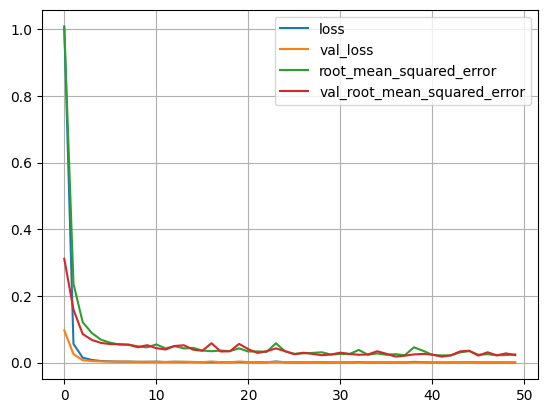

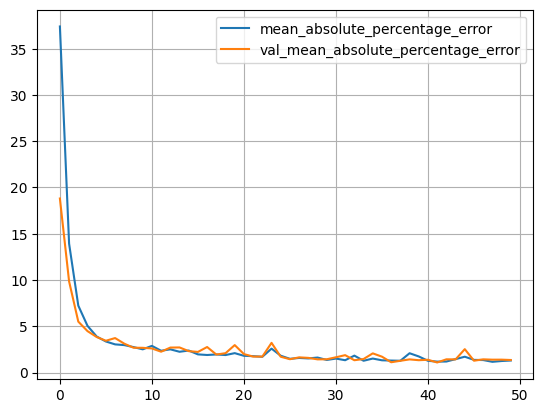

In [24]:
# Graficar el historial de entrenamiento:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

In [33]:

loss, RMSE, MAPE = model.evaluate(X_train_scaled, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)


# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE= model.evaluate(X_test_scaled, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)



192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 4.1786e-04 - mean_absolute_percentage_error: 1.1527 - root_mean_squared_error: 0.0204
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.00041531043825671077
root_mean_squared_error train: 0.020379167050123215
mean_absolute_percentage_error train: 1.1524394750595093
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 4.9133e-04 - mean_absolute_percentage_error: 1.3755 - root_mean_squared_error: 0.0221
Evaluar el modelo en el conjunto de prueba
loss test: 0.0005039307870902121
root_mean_squared_error test: 0.022448401898145676
mean_absolute_percentage_error test: 1.357085108757019


In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


lr=0.001
clf=MLPRegressor(solver='adam',
                                   learning_rate_init=lr,
                                   hidden_layer_sizes=(30,100),
                                   verbose=True,
                                   n_iter_no_change=100,
                                   random_state=42)

clf.fit(X_train_scaled,y_train)

Iteration 1, loss = 1.68821052
Iteration 2, loss = 0.21439276
Iteration 3, loss = 0.12537055
Iteration 4, loss = 0.09890177
Iteration 5, loss = 0.07742086
Iteration 6, loss = 0.05716161
Iteration 7, loss = 0.04028600
Iteration 8, loss = 0.02643343
Iteration 9, loss = 0.01759255
Iteration 10, loss = 0.01204957
Iteration 11, loss = 0.00881157
Iteration 12, loss = 0.00677791
Iteration 13, loss = 0.00547887
Iteration 14, loss = 0.00447930
Iteration 15, loss = 0.00387562
Iteration 16, loss = 0.00337742
Iteration 17, loss = 0.00300695
Iteration 18, loss = 0.00275609
Iteration 19, loss = 0.00250216
Iteration 20, loss = 0.00229188
Iteration 21, loss = 0.00214362
Iteration 22, loss = 0.00199118
Iteration 23, loss = 0.00189517
Iteration 24, loss = 0.00179722
Iteration 25, loss = 0.00170220
Iteration 26, loss = 0.00163434
Iteration 27, loss = 0.00157896
Iteration 28, loss = 0.00149917
Iteration 29, loss = 0.00141744
Iteration 30, loss = 0.00133876
Iteration 31, loss = 0.00132656
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(30, 100), n_iter_no_change=100,
             random_state=42, verbose=True)

In [26]:
y_pred=clf.predict(X_test_scaled)

In [32]:
mse=mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse:.2f}")
r2=r2_score(y_test,y_pred)
print(f"R^2: {r2}")

Error cuadrático medio: 0.00
R^2: 0.9997834735644126
